SyntaxError: invalid syntax (<ipython-input-23-b14364d492af>, line 1)

In [22]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
%matplotlib inline

ImportError: No module named tensorflow

In [2]:
data=pd.read_csv('Data_Entry_2017.csv')


In [50]:
data.shape

(112120, 12)

In [4]:
data.columns

Index([u'Image Index', u'Finding Labels', u'Follow-up #', u'Patient ID',
       u'Patient Age', u'Patient Gender', u'View Position',
       u'OriginalImage[Width', u'Height]', u'OriginalImagePixelSpacing[x',
       u'y]', u'Unnamed: 11'],
      dtype='object')

The data contains the following features:
Image Index: serves as image Id
Finding Labels: integer 
patient ID
Patient Age
Patient Gender
View Position


In [16]:
Finding_labels_counts = data['Finding Labels'].value_counts()
Finding_labels_counts

No Finding                                                                                        60361
Infiltration                                                                                       9547
Atelectasis                                                                                        4215
Effusion                                                                                           3955
Nodule                                                                                             2705
Pneumothorax                                                                                       2194
Mass                                                                                               2139
Effusion|Infiltration                                                                              1603
Atelectasis|Infiltration                                                                           1350
Consolidation                                                   

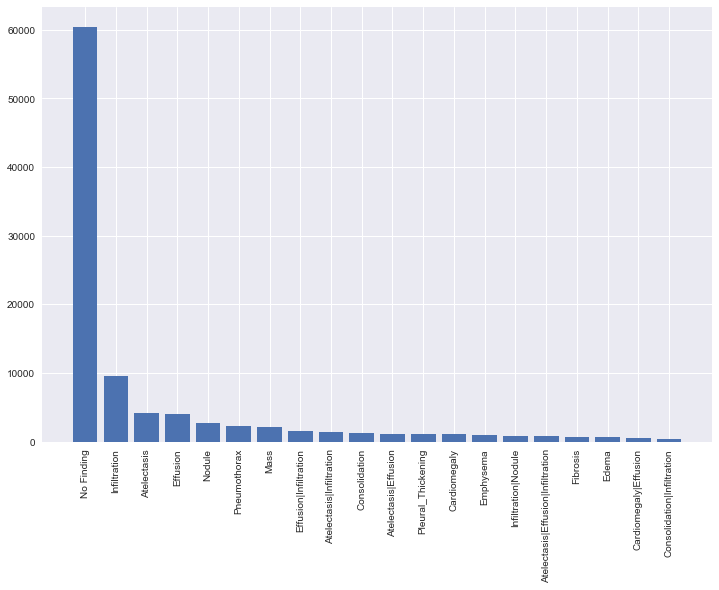

In [21]:
fig, ax1 = plt.subplots(1,1,figsize = (12, 8))
ax1.bar(np.arange(len(Finding_labels_counts[:20]))+0.5, Finding_labels_counts[:20])
ax1.set_xticks(np.arange(len(Finding_labels_counts[:20]))+0.5)
_ = ax1.set_xticklabels(Finding_labels_counts[:20].index, rotation = 90)

The Finding label will be the target value for the algorithm. Notice that the data is imbalanced toward No finding. Also, a great number of finding labels with few frequency (number of occurrence). We have to clean this dataset and eliminate the examples with "rare" finding label. To better visualize the distribution of data into different diseases, I drop the "No finding" category.

In [27]:
short_labels=Finding_labels_counts.drop(labels=['No Finding'])

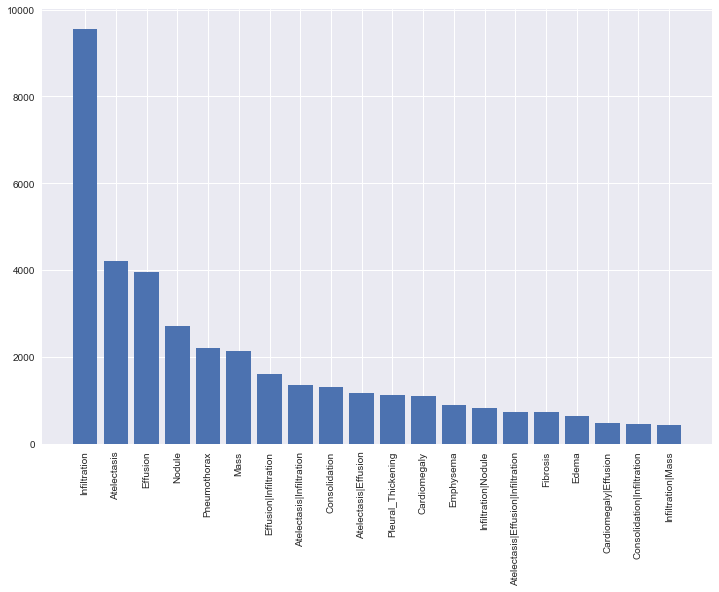

In [28]:
fig, ax1 = plt.subplots(1,1,figsize = (12, 8))
ax1.bar(np.arange(len(short_labels[:20]))+0.5, short_labels[:20])
ax1.set_xticks(np.arange(len(short_labels[:20]))+0.5)
_ = ax1.set_xticklabels(short_labels[:20].index, rotation = 90)

In [51]:
data.rename(columns={'Image_Index':'Image_Index','Finding Labels' :'Finding_Labels'}, inplace=True)

Infiltration is the most commen

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0FB4A630>]], dtype=object)

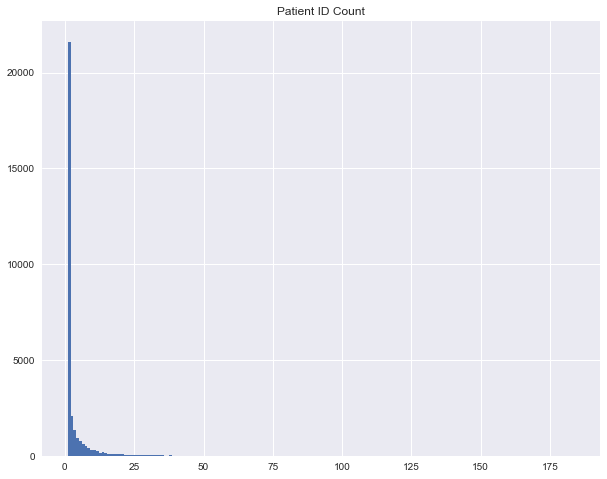

In [52]:
follow_ups = data[[ 'Patient ID' ]]
patient_follow_ups = follow_ups.groupby([ 'Patient ID' ])
grouped_df = patient_follow_ups.apply(lambda c: c.count()).add_suffix(' Count')
grouped_df.hist(column="Patient ID Count",bins=180,figsize=(10,8),label="Number of Follow-Ups per patient")

In [55]:
# create 6 subsets with the data from the 6 most frequent diseases:
data_infiltration =data.loc[data['Finding_Labels']=='Infiltration', :]
data_Atelectasis = data.loc[data['Finding_Labels']=='Atelectasis', :]
data_Effusion  = data.loc[data['Finding_Labels']=='Effusion', :]
data_Nodule = data.loc[data['Finding_Labels']=='Nodule', :]
data_Pneumothorax = data.loc[data['Finding_Labels']=='Pneumothorax', :]
data_Mass  = data.loc[data['Finding_Labels']=='Mass', :]


In [65]:
image_infiltration = plt.imread('images/00000005_006.png')
image_Atelectasis= plt.imread('images/00000032_012.png')
image_Effusion= plt.imread('images/00000017_000.png')
image_Nodule= plt.imread('images/00000021_000.png')
image_Pneumothorax= plt.imread('images/00000061_015.png')
image__Mass= plt.imread('images/00000013_024.png')


In [68]:
image_infiltration

array([[ 0.03529412,  0.03137255,  0.02745098, ...,  0.02352941,
         0.01568628,  0.        ],
       [ 0.03529412,  0.03137255,  0.03137255, ...,  0.02352941,
         0.01568628,  0.        ],
       [ 0.03529412,  0.03137255,  0.02745098, ...,  0.02352941,
         0.01568628,  0.        ],
       ..., 
       [ 0.58431375,  0.58431375,  0.57254905, ...,  0.20784314,
         0.20784314,  0.12156863],
       [ 0.65098041,  0.65490198,  0.64705884, ...,  0.22745098,
         0.23529412,  0.14901961],
       [ 0.73333335,  0.72156864,  0.72156864, ...,  0.25882354,
         0.26274511,  0.16470589]], dtype=float32)

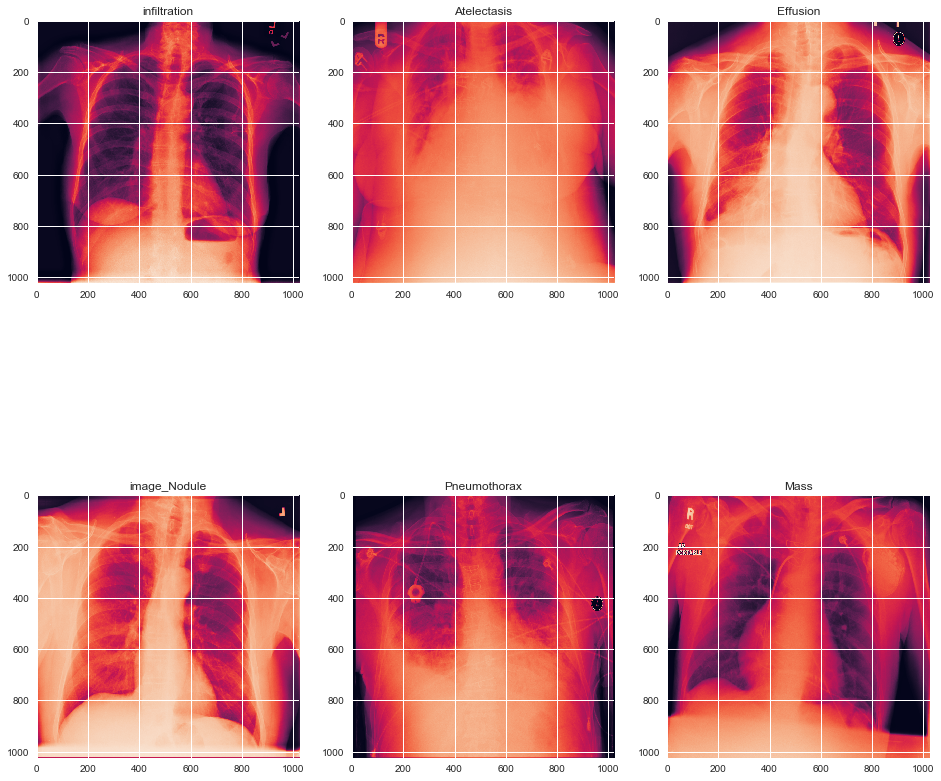

In [95]:
fig, axe = plt.subplots(2,3, figsize = (16, 16))
axe[0,0].set_title('infiltration')
axe[0,0].imshow(image_infiltration)
axe[0,1].set_title('Atelectasis')
axe[0,1].imshow(image_Atelectasis)
axe[0,2].set_title('Effusion')
axe[0,2].imshow(image_Effusion)
axe[1,0].set_title('image_Nodule')
axe[1,0].imshow(image_Nodule)
axe[1,1].set_title('Pneumothorax')
axe[1,1].imshow(image_Pneumothorax)
axe[1,2].set_title('Mass')
axe[1,2].imshow(image__Mass)
plt.show()


The feature 'View Position' has two possibile value "PA" and "AP" in what follows I am going to compare images from the two positions (all other parameters are the same)

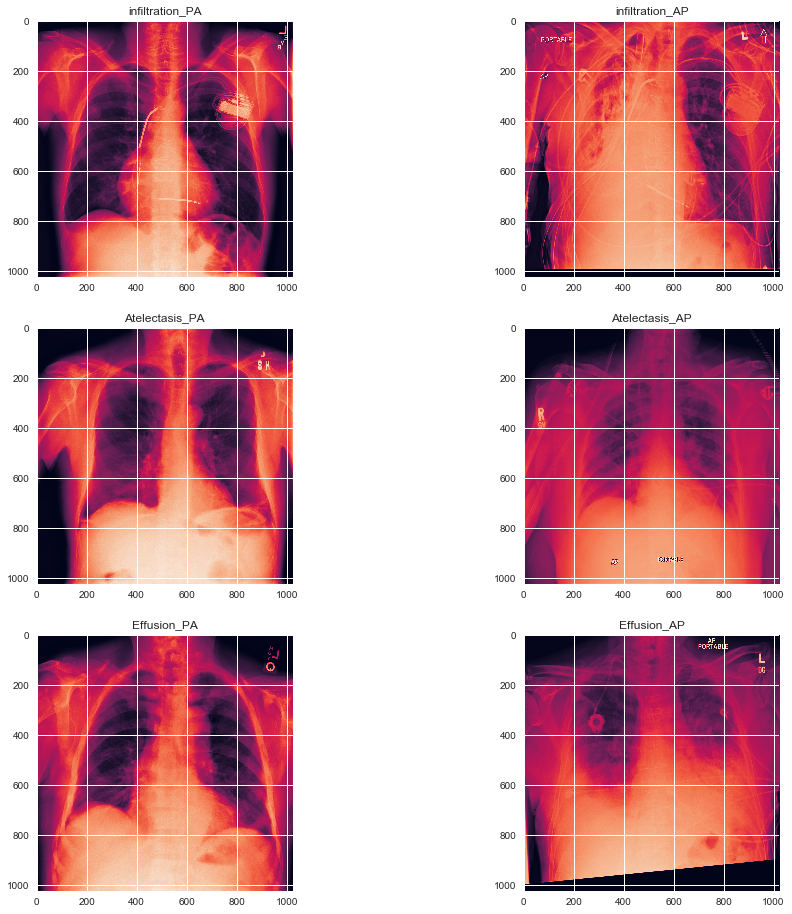

In [104]:
image_infiltration_AP = plt.imread('images/00000013_007.png')
image_infiltration_PA= plt.imread('images/00000013_022.png')
image_Atelectasis_AP=plt.imread('images/00000047_003.png')
image_Atelectasis_PA=plt.imread('images/00000030_000.png')
image_Effusion_AP=plt.imread('images/00000061_011.png')
image_Effusion_PA=plt.imread('images/00000011_000.png')

fig, axe = plt.subplots(3,2, figsize = (16, 16))
axe[0,0].set_title('infiltration_PA')
axe[0,0].imshow(image_infiltration_PA)
axe[0,1].set_title('infiltration_AP')
axe[0,1].imshow(image_infiltration_AP)
axe[1,0].set_title('Atelectasis_PA')
axe[1,0].imshow(image_Atelectasis_PA)
axe[1,1].set_title('Atelectasis_AP')
axe[1,1].imshow(image_Atelectasis_AP)
axe[2,1].set_title('Effusion_AP')
axe[2,1].imshow(image_Effusion_AP)
axe[2,0].set_title('Effusion_PA')
axe[2,0].imshow(image_Effusion_PA)


A clear difference in the intensity between AP and PA positions. This should be taken into account when using this data to train the CNN model.

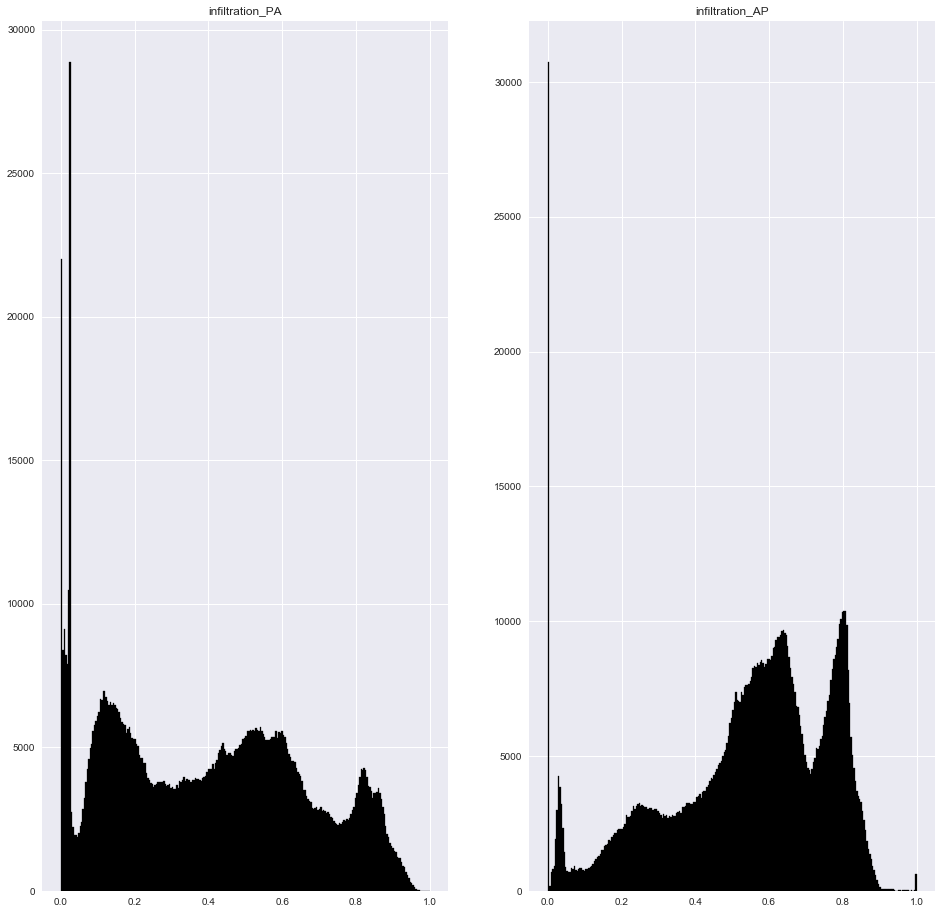

In [110]:
fig, axe = plt.subplots(1,2, figsize = (16, 16))
axe[0].set_title('infiltration_PA')
axe[0].hist(image_infiltration_PA.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')
axe[1].set_title('infiltration_AP')
axe[1].hist(image_infiltration_AP.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')
plt.show()

The histograms of AP and PA positions confirm the observation above